# Analyzing Berlin's Neighbourhoods using Airbnb Data

The intent of this notebook is to analyze the locality of hosts (i.e. host lives in the same neighbourhood as the listing object) on prices and room types of the listings.

### Questions answered in the following:
- what is the average price of listings per neighbourhood?
- do local hosts charge more for their object than average?
- can we succesfully increase the number of matched hosts?
- do local hosts offer more private rooms than other hosts?
- do private rooms tend to be cheaper?

In [1]:
# import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering & Assessment

In [2]:
listings = pd.read_csv('listings.csv.gz')

In [3]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.043200e+04,2.043200e+04,2.043200e+04,20420.000000,20420.000000,20432.000000,20432.000000,20432.000000,0.0,18742.000000,...,16134.000000,16120.000000,16131.000000,16122.000000,16119.000000,20432.000000,20432.000000,20432.000000,20432.000000,16574.000000
mean,2.332114e+07,2.020083e+13,8.370147e+07,3.518805,3.518805,52.510082,13.405073,2.737177,NaN,1.266407,...,9.342878,9.742060,9.745459,9.613696,9.406849,2.778387,1.800607,0.708741,0.165916,0.872933
std,1.360409e+07,8.675994e+00,9.624043e+07,25.117581,25.117581,0.032100,0.062328,1.626837,NaN,0.621753,...,1.016055,0.683007,0.684740,0.729116,0.850242,6.329044,5.655676,1.294403,2.157332,1.259858
min,1.944000e+03,2.020083e+13,1.581000e+03,0.000000,0.000000,52.340480,13.097180,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.162008e+07,2.020083e+13,1.054162e+07,1.000000,1.000000,52.489620,13.368640,2.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,2.237021e+07,2.020083e+13,4.094528e+07,1.000000,1.000000,52.510100,13.414710,2.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.370000
75%,3.595554e+07,2.020083e+13,1.276706e+08,2.000000,2.000000,52.532960,13.439213,3.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.050000
max,4.519743e+07,2.020083e+13,3.648624e+08,1152.000000,1152.000000,52.656630,13.758420,16.000000,NaN,12.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,65.000000,65.000000,14.000000,38.000000,30.740000


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20200830153825,2020-08-31,cafeheaven Pberg/Mitte,"Private, bright and friendly room. You'd be sh...",near all the trendy cafés and flea markets and...,https://a0.muscache.com/pictures/107924758/1f4...,2164,https://www.airbnb.com/users/show/2164,...,9.0,9.0,8.0,NaN,f,2,0,2,0,0.21
1,3176,https://www.airbnb.com/rooms/3176,20200830153825,2020-08-31,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,...,9.0,10.0,9.0,NaN,f,1,1,0,0,1.07
2,3309,https://www.airbnb.com/rooms/3309,20200830153825,2020-09-01,BerlinSpot Schöneberg near KaDeWe,First of all:<br />I prefer short-notice booki...,"My flat is in the middle of West-Berlin, direc...",https://a0.muscache.com/pictures/29054294/b1fa...,4108,https://www.airbnb.com/users/show/4108,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.31
3,7071,https://www.airbnb.com/rooms/7071,20200830153825,2020-08-31,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",https://a0.muscache.com/pictures/21278/32a1622...,17391,https://www.airbnb.com/users/show/17391,...,10.0,10.0,9.0,NaN,t,1,0,1,0,2.18
4,9991,https://www.airbnb.com/rooms/9991,20200830153825,2020-08-31,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,...,10.0,10.0,10.0,03/Z/RA/003410-18,f,1,1,0,0,0.13


# Data Preparation

In [5]:
# remove all columns that are not used within the analysis
all_columns = ['price', 'room_type', 'neighbourhood_group_cleansed', 'host_neighbourhood']
listings = listings[all_columns]

In [6]:
# caculate numeric prices
listings['price_dollar'] = listings['price']
listings['price'] = listings.price_dollar.str.strip('$').str.replace(',', '').astype('float')

In [7]:
# hot-enconde whether a listing is a private room or an entire home/apt
listings['private_room'] = 0
listings.loc[listings.room_type == 'Private room', 'private_room'] = 1
listings['entire_home'] = 0
listings.loc[listings.room_type == 'Entire home/apt', 'entire_home'] = 1

In [8]:
# do any columns require cleaning?
# how can we find this out?

In [9]:
listings.isna().sum()

price                              0
room_type                          0
neighbourhood_group_cleansed       0
host_neighbourhood              5532
price_dollar                       0
private_room                       0
entire_home                        0
dtype: int64

host_neighbourhood is the only column with missing values

In [10]:
# replace NaNs with the the location name 'unknown'
# this is done because we do not want to lose those rows while we want to indicate that the information is not know to us
listings.host_neighbourhood.fillna('unknown', inplace=True)

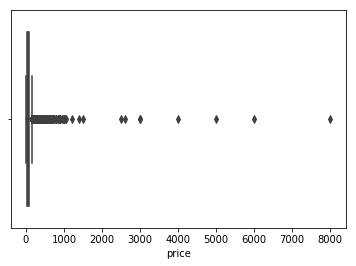

In [11]:
sns.boxplot(x=listings['price'])

In [12]:
price_cap = listings.price.quantile(0.995)

In [13]:
# I decided to remove everything above 1000$ because this is extremly unlikely and looking at the boxplot also extremly rare.
# Additionately I decided to cap the remaining values to the 99.5% quantile because it skrews the data needlessly
listings = listings[listings.price <= 1000]
price_cap_mask = listings.price > price_cap
listings.loc[price_cap_mask, 'price'] = price_cap

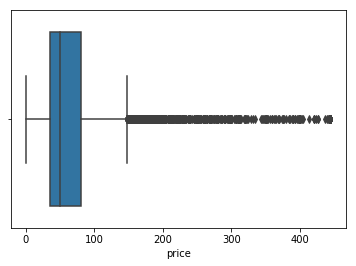

In [14]:
sns.boxplot(x=listings['price'])

# Analyzing and Visualizing Business Questions

### Analyzing the Price of Neighbourhoods

In [15]:
# counting the number of lustings per neighbourhood
listings.neighbourhood_group_cleansed.value_counts()

Friedrichshain-Kreuzberg    4588
Mitte                       4437
Pankow                      3182
Neukölln                    2832
Charlottenburg-Wilm.        1676
Tempelhof - Schöneberg      1380
Lichtenberg                  657
Treptow - Köpenick           649
Steglitz - Zehlendorf        438
Reinickendorf                294
Marzahn - Hellersdorf        144
Spandau                      142
Name: neighbourhood_group_cleansed, dtype: int64

In [16]:
# calculating the average price per neighbourhood
all_prices = listings.groupby('neighbourhood_group_cleansed').price.mean().sort_values(ascending=False)
all_prices

neighbourhood_group_cleansed
Mitte                       74.300847
Marzahn - Hellersdorf       73.449722
Spandau                     73.352113
Charlottenburg-Wilm.        72.771199
Pankow                      71.279739
Treptow - Köpenick          68.489476
Steglitz - Zehlendorf       64.172237
Tempelhof - Schöneberg      63.899971
Friedrichshain-Kreuzberg    63.106295
Lichtenberg                 53.027184
Neukölln                    52.085593
Reinickendorf               49.176224
Name: price, dtype: float64

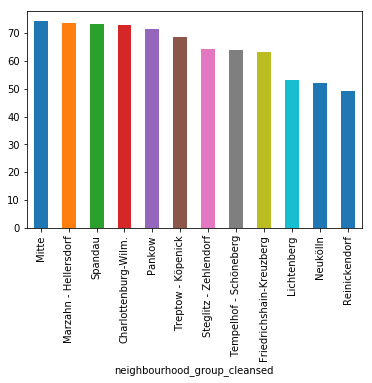

In [17]:
all_prices.plot.bar();

### Do local hosts value their neighbourhood higher than average?

In [18]:
# analyzing how many of the hosts we were able to tag as local
total_listings = listings.shape[0]
local_host_mask = listings.host_neighbourhood == listings.neighbourhood_group_cleansed
local_host_listings = local_host_mask.sum()
print('total number of listings in the dataset: ', total_listings)
print('number of listings where the host is local: ', local_host_listings)
print('percentage of listings where the host is local: ', local_host_listings/total_listings)

total number of listings in the dataset:  20419
number of listings where the host is local:  3762
percentage of listings where the host is local:  0.18424016847054214


In [19]:
# calculate average price of listings with local host
local_prices = listings[local_host_mask].groupby('neighbourhood_group_cleansed').price.mean().sort_values(ascending=False)
local_prices

neighbourhood_group_cleansed
Mitte            92.376361
Pankow           59.656552
Neukölln         52.218643
Lichtenberg      48.365941
Reinickendorf    44.568586
Spandau          34.555556
Name: price, dtype: float64

In [20]:
def visualize_local_impact(total_values, local_values):
    """
    Visualize a comparison between total values and hosts values for given series.
    
    INPUT:
    total_values - Series containing the information of the averages for all listings.
    local_values - Series containing the information of the averages only for listings with local hosts.
    
    """
    X=local_values.index
    df = pd.DataFrame(np.c_[local_values, total_values[X]], index=X)
    plt.figure();
    ax = df.plot.bar();
    ax.set_ylabel(local_values.name);
    ax.legend(['local hosts', 'all hosts']);

<Figure size 432x288 with 0 Axes>

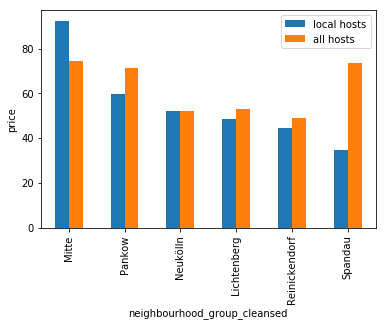

In [21]:
visualize_local_impact(all_prices, local_prices)

- Only 'Mitte' is showing higher prices for local hosts. 
- 'Neukölln' is very balanced while the rest is mostly showing slightly higher prices for the mean of all listings. 
- 'Spandau' for local hosts is only half of the average price of all listings. 
- Next, we will check the value counts to see if we got any problems with a very small sample size

In [22]:
listings[local_host_mask].host_neighbourhood.value_counts()

Neukölln         1887
Mitte            1492
Pankow            174
Lichtenberg       101
Reinickendorf      99
Spandau             9
Name: host_neighbourhood, dtype: int64

- The sample of Spandau in the local host mask is very small, therefore unlikely meaningful. 
- The rest of the neighbourhoods are decent to well sized for the analysis

We see that many of the neighbourhoods of our original listings are not matched.

Next, we will try to improve the number of neighbourhoods matched.

### Can we improve the matching of Listing-Neighbourhoods and Host-Neighbourhoods?

In [23]:
listings[['host_neighbourhood', 'neighbourhood_group_cleansed']].head()

,host_neighbourhood,neighbourhood_group_cleansed
0,Wedding,Mitte
1,Prenzlauer Berg,Pankow
2,Schöneberg,Tempelhof - Schöneberg
3,Prenzlauer Berg,Pankow
4,Prenzlauer Berg,Pankow


it seems like some neighbourhoods are just grouped together by there names connected by a hyphen

In [24]:
# create a new column with grouped neighbourhood names
listings['host_neighbourhood_grouped'] = listings['host_neighbourhood']

In [25]:
# search the column 'neighbourhood_group_cleansed' with the host_neighbourhood string to find matches
matching_group_found = listings.apply(lambda x: x.host_neighbourhood_grouped in x.neighbourhood_group_cleansed, axis=1)

In [26]:
# matches
listings[matching_group_found][['host_neighbourhood_grouped', 'neighbourhood_group_cleansed']].head(5)

,host_neighbourhood_grouped,neighbourhood_group_cleansed
2,Schöneberg,Tempelhof - Schöneberg
6,Kreuzberg,Friedrichshain-Kreuzberg
9,Kreuzberg,Friedrichshain-Kreuzberg
10,Kreuzberg,Friedrichshain-Kreuzberg
11,Mitte,Mitte


In [27]:
# replace the corresponding value in the host_neighbourhood_grouped column with the group name
listings.loc[matching_group_found, 'host_neighbourhood_grouped'] = listings.loc[matching_group_found, 'neighbourhood_group_cleansed']

In [28]:
total_listings = listings.shape[0]
local_host_mask_grouped = listings.host_neighbourhood_grouped == listings.neighbourhood_group_cleansed
local_host_listings_grouped = local_host_mask_grouped.sum()
print(total_listings)
print(local_host_listings_grouped)
print(local_host_listings_grouped/total_listings)
# reminder (before):
# 20432
# 3764
# 0.18422083007047768

20419
8597
0.42102943337088006


we were able to significantly increase the number of matching neighbourhoods with this method

In [29]:
# calculate average prices per neighbourhood for local hosts using the new mask
local_prices_grouped = listings[local_host_mask_grouped].groupby('neighbourhood_group_cleansed').price.mean().sort_values(ascending=False)
local_prices_grouped

neighbourhood_group_cleansed
Mitte                       92.376361
Marzahn - Hellersdorf       89.023265
Treptow - Köpenick          81.333333
Charlottenburg-Wilm.        69.261370
Tempelhof - Schöneberg      63.956065
Friedrichshain-Kreuzberg    63.935049
Steglitz - Zehlendorf       60.879167
Pankow                      59.656552
Neukölln                    52.212172
Lichtenberg                 48.365941
Reinickendorf               44.568586
Spandau                     34.555556
Name: price, dtype: float64

<Figure size 432x288 with 0 Axes>

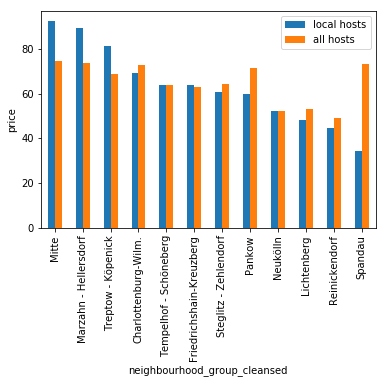

In [30]:
visualize_local_impact(all_prices, local_prices_grouped)

#### Only the hyphen connected neighbourhood-names are added to the plot, namely:
- Friedrichshain-Kreuzberg and Tempelhof - Schöneberg which show very leveled prices
- Steglitz - Zehlendorf while also being pretty close together is slightly in favor of all hosts
- Marzahn - Hellersdorf, Treptow - Köpenick have  a pretty low sample size below 50. Nonetheless they are favoring local hosts

In [31]:
listings[local_host_mask_grouped].host_neighbourhood_grouped.value_counts()

Friedrichshain-Kreuzberg    3161
Neukölln                    1888
Mitte                       1492
Tempelhof - Schöneberg       864
Charlottenburg-Wilm.         562
Pankow                       174
Steglitz - Zehlendorf        156
Lichtenberg                  101
Reinickendorf                 99
Marzahn - Hellersdorf         49
Treptow - Köpenick            42
Spandau                        9
Name: host_neighbourhood_grouped, dtype: int64

#### No clear signs either that local hosts charge higher or lower prices in all neighbourhoods.
Questions that come to my mind

- do local hosts offer more private rooms than other hosts?
- do private rooms tend to be cheaper?

### Private rooms of local hosts and their prices

#### Local hosts do not clearly offer an above average ratio of private rooms

In [32]:
total_private_rooms_per_neighbourhood = listings.groupby('neighbourhood_group_cleansed').private_room.mean().sort_values(ascending=False)
total_private_rooms_per_neighbourhood

neighbourhood_group_cleansed
Neukölln                    0.538489
Reinickendorf               0.523810
Lichtenberg                 0.494673
Friedrichshain-Kreuzberg    0.470793
Steglitz - Zehlendorf       0.442922
Tempelhof - Schöneberg      0.431159
Charlottenburg-Wilm.        0.403938
Mitte                       0.393960
Marzahn - Hellersdorf       0.381944
Treptow - Köpenick          0.371341
Pankow                      0.359837
Spandau                     0.345070
Name: private_room, dtype: float64

In [33]:
local_private_rooms_per_neighbourhood = listings[local_host_mask_grouped].groupby('neighbourhood_group_cleansed').private_room.mean().sort_values(ascending=False)
local_private_rooms_per_neighbourhood

neighbourhood_group_cleansed
Spandau                     0.555556
Neukölln                    0.546081
Reinickendorf               0.545455
Lichtenberg                 0.534653
Friedrichshain-Kreuzberg    0.472003
Steglitz - Zehlendorf       0.455128
Pankow                      0.454023
Tempelhof - Schöneberg      0.450231
Charlottenburg-Wilm.        0.423488
Marzahn - Hellersdorf       0.387755
Treptow - Köpenick          0.309524
Mitte                       0.262064
Name: private_room, dtype: float64

<Figure size 432x288 with 0 Axes>

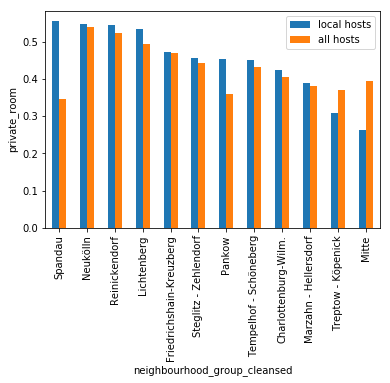

In [34]:
visualize_local_impact(total_private_rooms_per_neighbourhood, local_private_rooms_per_neighbourhood)

As before, the questions can't be clearly answered for all neighbourhoods. 

It seems that local hosts are slightly offerering an above average number of private rooms, though the difference is not really significant in most neighbourhoods.

Interestringly, the plots are pretty much reversed of the picture before. E.g. Mitte has an below average count of of private_rooms for local hosts, while they had the highest prices for local hosts at the same time. While Spandau was the complete opposite. Other Neighbourhoods have the same behaviour.

This increases the Assumption that private rooms tend to be cheaper.

#### Private Rooms are cheaper than Entire Homes/Apts

In [35]:
listings.room_type.value_counts()

Entire home/apt    11036
Private room        8868
Shared room          279
Hotel room           236
Name: room_type, dtype: int64

Since the vast majority of listings is either categorized as 'Private room' or 'Entire home/apt' we will only compare these two in the following

In [36]:
df_room_type_per_neighbourhood = pd.DataFrame(listings[(listings.private_room == 1)|(listings.entire_home == 1)].groupby(['neighbourhood_group_cleansed', 'room_type']).price.mean())
df_room_type_per_neighbourhood

price
neighbourhood_group_cleansed room_type                 
Charlottenburg-Wilm.         Entire home/apt  86.950107
                             Private room     48.681374
Friedrichshain-Kreuzberg     Entire home/apt  82.399949
                             Private room     42.217407
Lichtenberg                  Entire home/apt  70.959500
                             Private room     36.760462
Marzahn - Hellersdorf        Entire home/apt  90.510115
                             Private room     45.406909
Mitte                        Entire home/apt  95.656235
                             Private room     45.007551
Neukölln                     Entire home/apt  70.764298
                             Private room     36.355961
Pankow                       Entire home/apt  85.934387
                             Private room     44.990908
Reinickendorf                Entire home/apt  64.026788
                             Private room     35.754156
Spandau                      Entire home/apt  83.794167
                             Private room     38.836735
Steglitz - Zehlendorf        Entire home/apt  82.045617
                             Private room     43.302680
Tempelhof - Schöneberg       Entire home/apt  81.013085
                             Private room     40.238908
Treptow - Köpenick           Entire home/apt  85.765013
                             Private room     41.474813

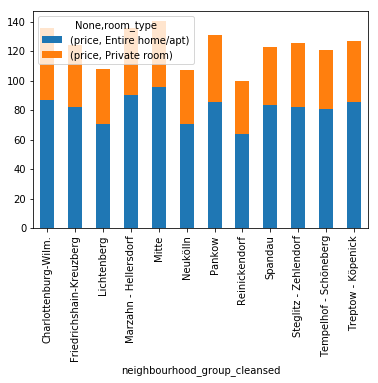

In [37]:
df_room_type_per_neighbourhood.unstack().plot(kind='bar', stacked=True);

It is not suprising that indeed private rooms tend to be cheaper.